In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
from utilidades import load_data,get_mean_af
from sklearn.cluster import KMeans, DBSCAN
from functools import reduce
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs

/home/rogelio/anaconda3/envs/geopandas_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [1]:
# GAP Statistic function
def compute_inertia(a, X):
    from sklearn.metrics import pairwise_distances
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=5, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

In [4]:
x, y = make_blobs(750, n_features=2, centers=12)

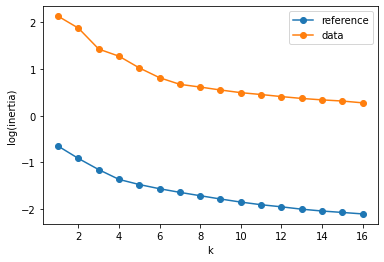

Text(0.5, 0, 'k')

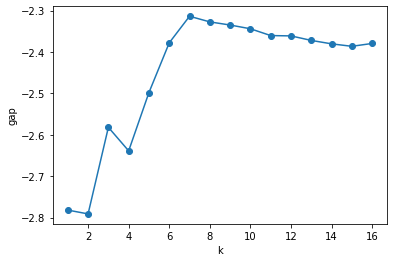

In [6]:
k_max = 16
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(n_init=100), x, k_max)

plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.legend()
plt.show()

plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')

In [17]:
gap

array([-2.78200583, -2.79125714, -2.58197328, -2.63888815, -2.49791687,
       -2.37779601, -2.31354525, -2.32721291, -2.33478363, -2.34381405,
       -2.36024378, -2.36104899, -2.37198365, -2.38025721, -2.38619856,
       -2.37929808])

In [14]:
np.where(gap==gap.max())

(array([6]),)

In [3]:
afs=load_data()

Using all features

In [4]:
antifs=[]
for name, antif in afs.items():
    antif.columns = ['country','date','af_in_pr_'+name[2:],'af_in_vl'+name[2:],'af_ex_pr'+name[2:],'af_ex_vl'+name[2:], 'af_in_pr2'+name[2:],
                    'af_in_pr2'+name[2:], 'af_ex_pr2'+name[2:],'af_ex_vl2'+name[2:]]
    antifs.append(antif)

In [5]:
result=reduce(lambda df1,df2: df1.merge(df2,how='inner',on=['country','date']),antifs)

In [6]:
_A=result.groupby(['country']).mean().drop(columns='date')

In [7]:
_A = _A.dropna(axis=0)

In [8]:
_A.head()

,af_in_pr_cal,af_in_vlcal,af_ex_prcal,af_ex_vlcal,af_in_pr2cal,af_in_pr2cal,af_ex_pr2cal,af_ex_vl2cal,af_in_pr_gdp,af_in_vlgdp,...,af_ex_pr2pop,af_ex_vl2pop,af_in_pr__ye,af_in_vl_ye,af_ex_pr_ye,af_ex_vl_ye,af_in_pr2_ye,af_in_pr2_ye,af_ex_pr2_ye,af_ex_vl2_ye
country,,,,,,,,,,,,,,,,,,,,,
Albania,-0.026102,-0.035248,0.066216,0.008545,-0.019201,-0.043655,0.047753,0.024743,-0.079464,-0.070233,...,0.039704,0.016784,-0.026102,-0.035248,0.066216,0.008545,-0.019201,-0.043655,0.047753,0.024743
Algeria,-0.031142,-0.002080,-0.239964,-0.158451,-0.030727,-0.001506,-0.198888,-0.225999,-0.027686,-0.010515,...,-0.207958,-0.221005,-0.031142,-0.002080,-0.239964,-0.158451,-0.030727,-0.001506,-0.198888,-0.225999
Antigua and Barbuda,-0.146845,-0.029541,0.011013,0.024245,-0.117734,-0.039245,0.006450,0.027846,0.026909,-0.036897,...,0.012699,0.031588,-0.146845,-0.029541,0.011013,0.024245,-0.117734,-0.039245,0.006450,0.027846
Argentina,0.033498,0.023616,0.005941,0.010845,0.036114,0.021479,0.006951,0.010015,0.013221,0.015384,...,0.014673,0.012075,0.033498,0.023616,0.005941,0.010845,0.036114,0.021479,0.006951,0.010015
Armenia,0.034859,0.081951,0.077354,-0.019278,0.041474,0.078780,0.051765,0.020049,0.042464,0.074215,...,0.089059,0.040588,0.034859,0.081951,0.077354,-0.019278,0.041474,0.078780,0.051765,0.020049


In [121]:
_A_original=_A.iloc[:,-8:] # Only original antifragility.

In [9]:
RANDOM_STATE=1

### PCA

In [11]:
pca = PCA(n_components=3,random_state=RANDOM_STATE).fit(_A)
_A_projected=pca.transform(_A)

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.53756786, 0.73467991, 0.81174867])

In [13]:
pca.n_components_

3

<AxesSubplot:>

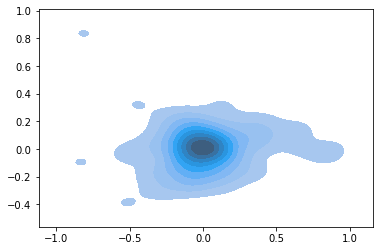

In [14]:
sns.kdeplot(x=_A_projected[:,0],y=_A_projected[:,1],fill=True) # all features

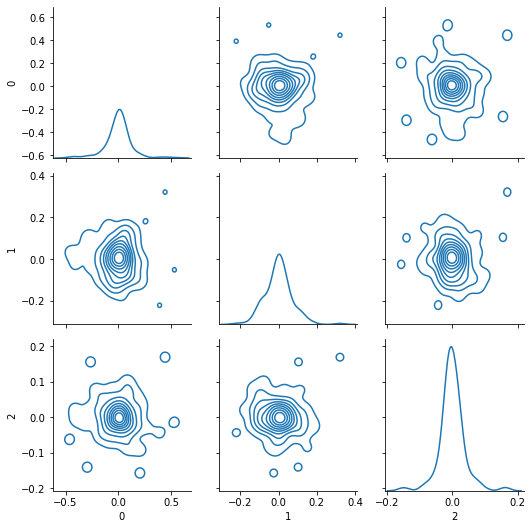

In [152]:
g = sns.PairGrid(pd.DataFrame(_A_projected))
g = g.map_diag(sns.kdeplot)
g = g.map_offdiag(sns.kdeplot)

<AxesSubplot:>

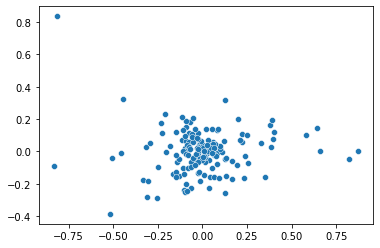

In [135]:
sns.scatterplot(x=_A_projected[:,0],y=_A_projected[:,1])

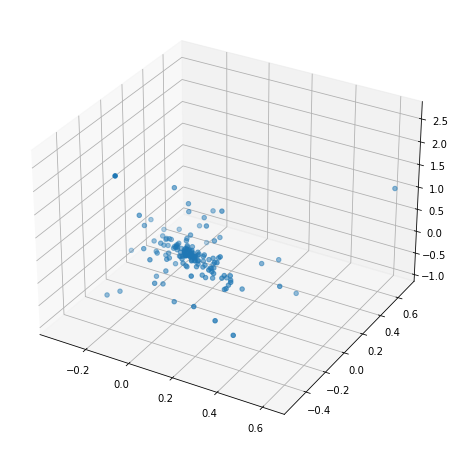

In [172]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = _A_projected[:,0]
xdata = _A_projected[:,1]
ydata = _A_projected[:,2]
ax.scatter3D(xdata, ydata, zdata)

In [154]:
cluster = DBSCAN(eps=.3).fit(_A_projected)
ys=cluster.labels_
grupos_km = pd.DataFrame({'country':_A.index.values,'grupo':ys})

In [155]:
grupos_km=grupos_km.set_index('country')

<AxesSubplot:xlabel='grupo'>

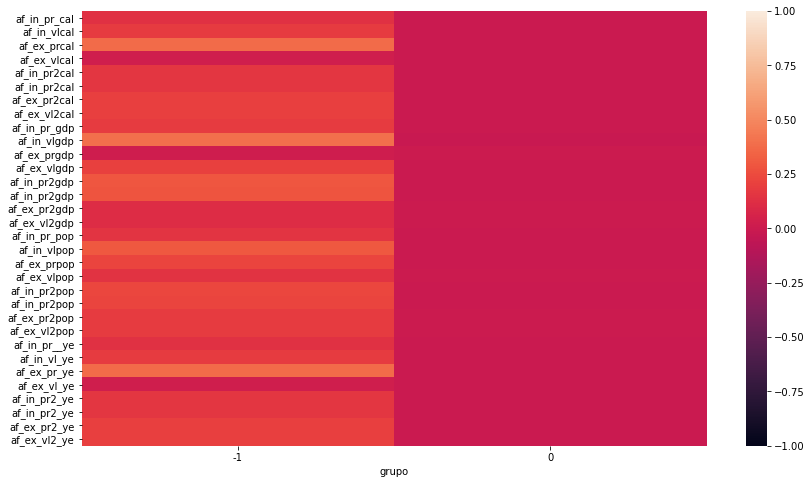

In [156]:
plt.figure(figsize=(14,8))
sns.heatmap(_A.join(grupos_km).groupby('grupo').mean().T,vmin=-1,vmax=1)

In [157]:
grupos_km[grupos_km.grupo==-1] #.3

,grupo
country,
Kiribati,-1


In [215]:
for country in grupos_km[grupos_km.grupo==-1].index:
    plt.figure()
    sns.heatmap(_A.loc[country].to_frame(),vmin=-1,vmax=1)
    plt.savefig('heatmaps/grupo1/'+country+'.png')
    plt.close()

In [214]:
for country in grupos_km[grupos_km.grupo==0].index:
    plt.figure()
    sns.heatmap(_A.loc[country].to_frame(),vmin=-1,vmax=1)
    plt.savefig('heatmaps/grupo2/'+country+'.png')
    plt.close()

### GAP Statistic --- Estimating number of clusters

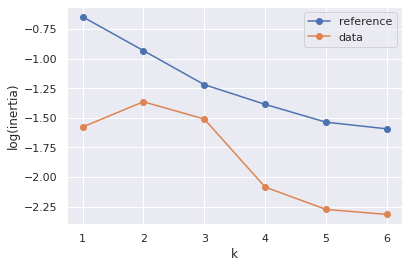

Text(0.5, 0, 'k')

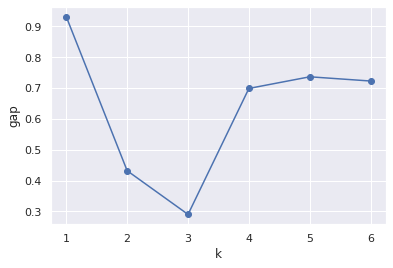

In [68]:
k_max = 6
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(random_state=RANDOM_STATE,n_init=100), _A_projected, k_max)

plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.legend()
plt.show()

plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')

## KMeans

In [69]:
cluster = KMeans(n_clusters=4,random_state=RANDOM_STATE,n_init=100).fit(_A_projected)
ys=cluster.labels_

grupos_km = pd.DataFrame({'country':_A.index.values,'grupo':ys})

In [70]:
# grupos_km.pivot(columns='grupo').to_excel('~/ver_clusters_v2.xlsx')

In [71]:
grupos_km=grupos_km.set_index('country')

<AxesSubplot:xlabel='grupo'>

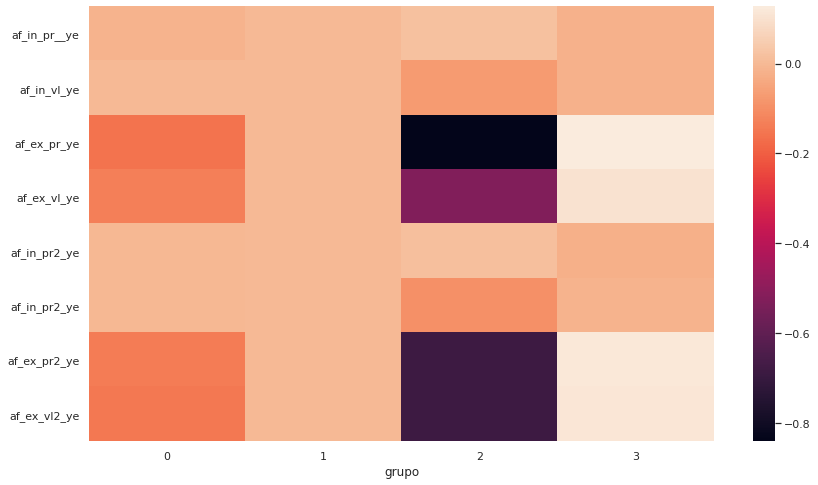

In [72]:
plt.figure(figsize=(14,8))
sns.heatmap(_A.join(grupos_km).groupby('grupo').mean().T)

In [73]:
grupos_km[grupos_km['grupo']==3]

,grupo
country,
Albania,3
Azerbaijan,3
"Bahamas, The",3
Belize,3
Burkina Faso,3
Burundi,3
Djibouti,3
Fiji,3
French Guiana,3
